# Module 4

## 1.Load dataset

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [227]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.EDA

In [228]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [229]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [230]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [231]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical   =list(df.dtypes[df.dtypes != 'object'].index)

In [232]:
for col in categorical:
    df[col] = df[col].str.lower().str.replace(' ','_')
    

In [233]:
categorical.remove('customerid')
categorical.remove('churn')


In [234]:
df[categorical].describe()

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,male,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [235]:
df['churn'] = df['churn'] == 'yes'

In [236]:
df.churn= df['churn'].astype(int)

In [237]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


## 3.split the dataset

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
full_train , test_set = train_test_split(df, test_size=0.2 , random_state=1)
train_set , val_set = train_test_split(full_train, test_size=0.25 , random_state=1)
len(train_set),len(val_set),len(test_set)

(4225, 1409, 1409)

In [240]:
train_set = train_set.reset_index(drop=True)
val_set   = val_set.reset_index(drop=True)
test_set  = test_set.reset_index(drop=True)

In [241]:
y_train = train_set['churn'].values
y_val   = val_set['churn'].values
y_test  = test_set['churn'].values


In [242]:
del train_set['churn']
del val_set['churn']
del test_set['churn']


## 4.train the model

In [243]:
numerical + categorical

['seniorcitizen',
 'tenure',
 'monthlycharges',
 'totalcharges',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [244]:
dv = DictVectorizer(sparse=False)

In [245]:
train_dicts = train_set[categorical + numerical].to_dict(orient='records')

In [246]:
val_dicts = val_set[categorical + numerical].to_dict(orient='records')

In [247]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [248]:
model = LogisticRegression()

In [249]:
y_train.mean()

np.float64(0.2686390532544379)

In [250]:
model.fit(X_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [258]:
y_pred = model.predict_proba(X_val)[: , 1]

In [263]:
accuracy = ((y_pred> 0.5) == y_val).mean()

In [264]:
accuracy

np.float64(0.8034066713981547)

## Plot the accuracy

In [267]:
thresholds = np.linspace(0,1,21)
score = []
for t in thresholds:
    score.append(((y_pred> t) == y_val).mean())
        

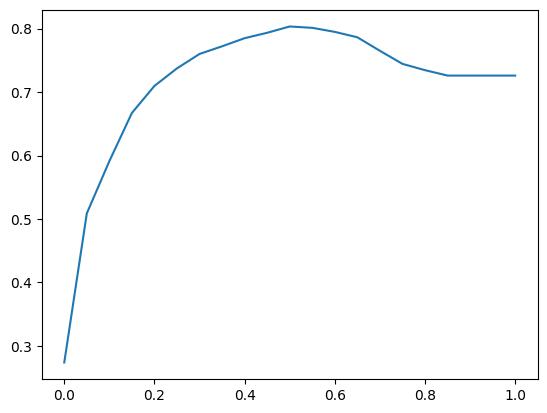

In [297]:
plt.plot(thresholds,score)

## Confusion table

In [311]:
actual_positive = y_val == 1
actual_negative = y_val == 0 

In [316]:
pred_positive = y_pred >= 0.5
pred_negative = y_pred < 0.5

In [317]:
tp = (pred_positive & actual_positive).sum()
tn = (pred_negative & actual_negative).sum()

fp = (pred_positive & actual_negative).sum()
fn = (pred_negative & actual_positive).sum()

In [318]:
precision = tp / (tp+fp)
recall    = tp / (tp+fn)

In [319]:
precision,recall

(np.float64(0.6752411575562701), np.float64(0.5440414507772021))